## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

### 1


In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


df = mnist.load_data('mnist.db')
train, test = df
X_train, y_train = train
X_test, y_test = test


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Label: 7 

Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 19

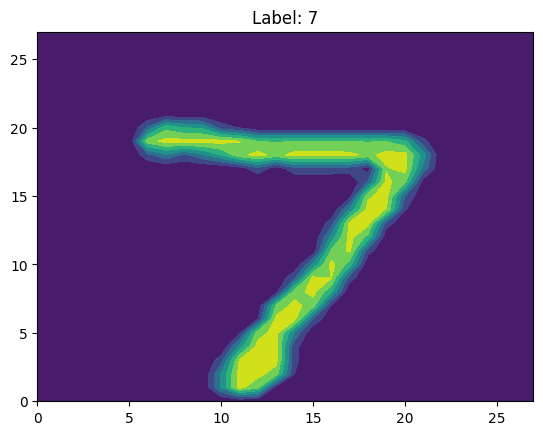

Label: 2 

Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 20

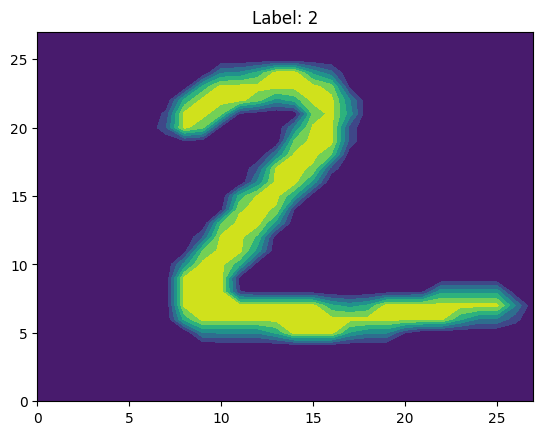

Label: 1 

Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

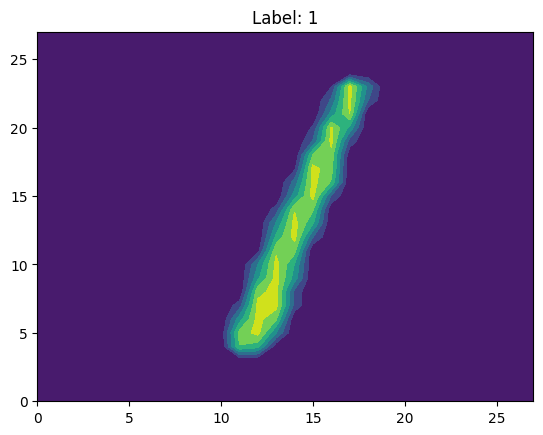

Label: 0 

Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 25

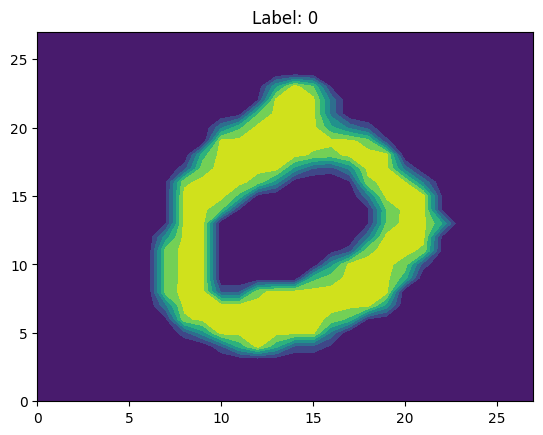

Label: 4 

Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   

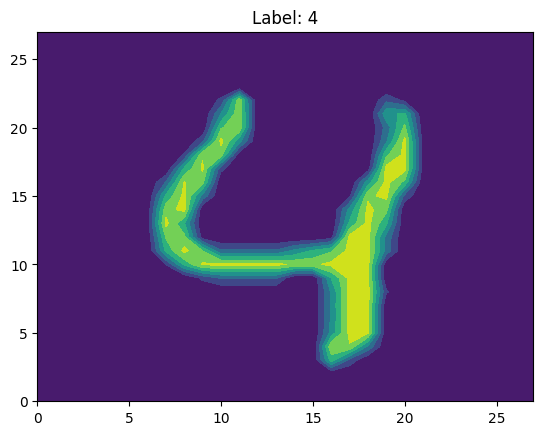

In [6]:
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print("Label:", y_test[i], '\n')
    print("Matrix:\n", X_test[i], '\n')  
    plt.contourf(np.rot90(X_test[i].transpose())) 
    plt.title(f"Label: {y_test[i]}")
    plt.show()

### 2


Shape of X_train and X_test:

    X_train: (60000, 28, 28) — 60,000 training images, each of size 28x28.

    X_test: (10000, 28, 28) — 10,000 test images, each of size 28x28.

Shape of X_train[i] and X_test[i]:

    Each is a 28x28 matrix representing a handwritten digit.

Shape of y_train and y_test:

    y_train: (60000,) — 60,000 labels for the training set.

    y_test: (10000,) — 10,000 labels for the test set.

### 3

In [ ]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 28 * 28))
X_test_reshaped = X_test.reshape((X_test.shape[0], 28 * 28))

print("Reshaped X_train:", X_train_reshaped.shape)
print("Reshaped X_test:", X_test_reshaped.shape)

Reshaped X_train: (60000, 784)
Reshaped X_test: (10000, 784)


### 4

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k_values = [3, 5, 7, 10, 15, 20]
accuracy_results = []

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reshaped, y_train)
    

    y_pred = knn.predict(X_test_reshaped)
    

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((k, accuracy))
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

optimal_k = max(accuracy_results, key=lambda x: x[1])[0]
print("Optimal k:", optimal_k)

k = 3, Accuracy = 0.9705
k = 5, Accuracy = 0.9688
k = 7, Accuracy = 0.9694
k = 10, Accuracy = 0.9665
k = 15, Accuracy = 0.9633
k = 20, Accuracy = 0.9625
Optimal k: 3


### 5

Final Accuracy (k=3): 0.9705


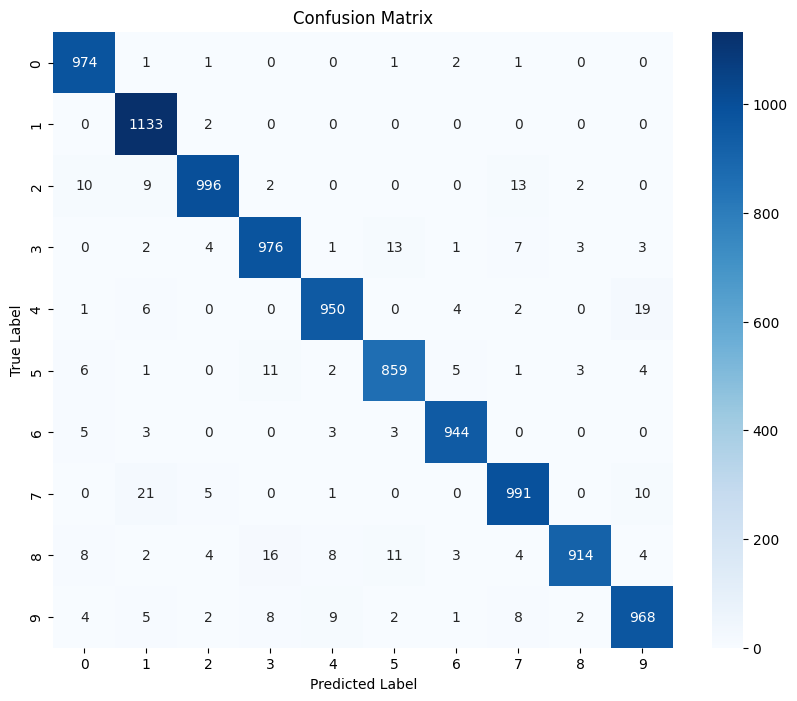

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_reshaped, y_train)

y_pred_final = knn_final.predict(X_test_reshaped)

accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy (k={optimal_k}): {accuracy_final:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 6

Highly correct:
- 974 correct predictions for digit 0
- 1133 for digit 1

miscallsified: 
-Digit 2:

--Misclassified as 7 (13 instances).

-Digit 4:

--Misclassified as 9 (19 instances).

-Digit 5:

--Misclassified as 3 (11 instances) and 8 (4 instances).

-Digit 7:

--Misclassified as 1 (21 instances) and 9 (10 instances).

-Digit 8:

--Misclassified as 3 (16 instances) and 5 (11 instances).

-Digit 9:

--Misclassified as 4 (9 instances) and 7 (8 instances).

possible reasons/patterns
    
    2 ↔ 7: Both have curves and lines.

    4 ↔ 9: Both have closed loops.

    5 ↔ 3: Both have curves and similar strokes.

    7 ↔ 1: Both have straight lines.

    8 ↔ 3: Both have curves and loops.

    9 ↔ 4: Both have closed loops.

### 7

If there is high contrast, then we could convert to black and white, increase the constrast, and represent the photo as a 2d matrix. But another method if there isn't high contrast is to use a 3d matrix of shape (height, width, RGB)